In [1]:
import deepSI
import numpy as np
from scipy.io import loadmat
from encoder_LPV_models import LPV_multi_encoder, LPV_single_encoder
from matplotlib import pyplot as plt

In [2]:
out = loadmat('gyroscope_data/ML_estim.mat')
u = np.concatenate([out['exp_u'], np.transpose([np.array(out['exp_p'][:, 1])])], axis = 1)
y = out['exp_y']
train = deepSI.System_data(u = u, y = y)
out = loadmat('gyroscope_data/ML_valid.mat')
u = np.concatenate([out['exp_u'], np.transpose([np.array(out['exp_p'][:, 1])])], axis = 1)
y = out['exp_y']
test = deepSI.System_data(u = u, y = y)

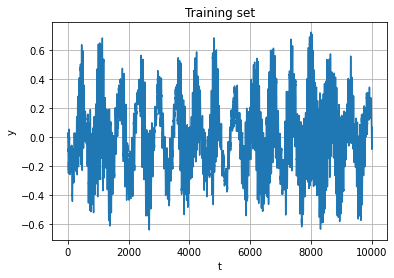

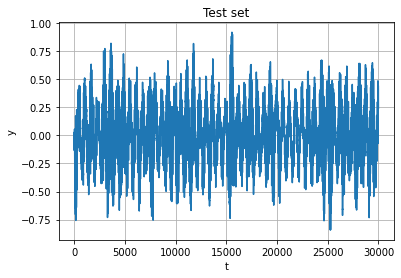

In [3]:
train.plot()
plt.title("Training set")
plt.grid()
plt.show()

test.plot()
plt.title("Test set")
plt.grid()
plt.show()

In [3]:
sys = LPV_single_encoder(nx=5, Np=3, na=10, nb=10, feedthrough=True, include_u_in_p=True, f_net_kwargs=dict(F=10), \
                        e_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 2), \
                        p_net_kwargs=dict(n_nodes_per_layer = 64, n_hidden_layers = 2))
sys.init_model(sys_data=train)

In [4]:
sys.fit(train, train[-25000:], epochs = 1000, loss_kwargs=dict(nf=80, loss_nf_cutoff=1))

Model already initilized (init_model_done=True), skipping initilizing of the model, the norm and the creation of the optimizer
Size of the training array =  20.4 MB
N_training_samples = 9911, batch_size = 256, N_batch_updates_per_epoch = 38


/home/frank/.local/lib/python3.9/site-packages/deepSI/fit_systems/encoders.py:230: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  action = torch.tensor(action, dtype=torch.float32) #(N,...)


Initial Validation sim-NRMS= 0.9886300256669228


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/frank/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


22 1 1 77 4 35 28 33 2 63 5 4 12 33 20 76 23 3 38 39 9 45 38 42 10 46 29 ########## New lowest validation loss achieved ########### sim-NRMS = 0.8964049486226602
Epoch    1, sqrt loss  0.9438, Val sim-NRMS 0.8964, Time Loss: 48.8%, data: 0.2%, val: 51.0%,  1.8 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.7951864359208148
Epoch    2, sqrt loss   0.844, Val sim-NRMS 0.7952, Time Loss: 55.8%, data: 0.1%, val: 44.1%,  1.5 batches/sec
45 ########## New lowest validation loss achieved ########### sim-NRMS = 0.7923052360758318
Epoch    3, sqrt loss  0.7876, Val sim-NRMS 0.7923, Time Loss: 59.5%, data: 0.1%, val: 40.4%,  1.4 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.7698192431989231
Epoch    4, sqrt loss  0.7626, Val sim-NRMS 0.7698, Time Loss: 62.1%, data: 0.1%, val: 37.8%,  1.3 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.7560951373636291
Epoch    5, sqrt loss  0.7395, Val 

In [6]:
#sys.save_system('results/gyroscope_nx5_np3_na10_nb10')

In [8]:
sys = deepSI.load_system('results/gyroscope_nx5_np3_na10_nb10')

Training RMS: 0.016589134809934448
Training NRMS: 5.463809560718839%
Test RMS: 0.024574791149872273
Test NRMS: 9.13453092581218%
Test BFR: 90.86546907418781%


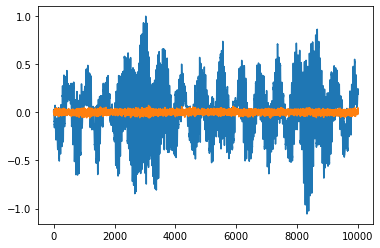

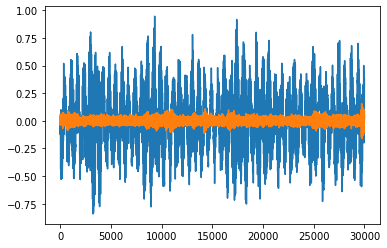

In [9]:
res1 = sys.apply_experiment(train)
print("Training RMS: " + str(res1.RMS(train)))
print("Training NRMS: " + str(res1.NRMS(train) * 100) + "%")

res2 = sys.apply_experiment(test)
print("Test RMS: " + str(res2.RMS(test)))
print("Test NRMS: " + str(res2.NRMS(test) * 100) + "%")
print("Test BFR: " + str((res2.BFR(test))) + "%")

plt.plot(train.y)
plt.plot(res1.y - train.y)
plt.show()
plt.plot(test.y)
plt.plot(res2.y - test.y)
plt.show()

In [6]:
name1 = "results/gyro_out.m"
name2 = "results/gyro_real_out.m"

logY = res2.y
logYR = test.y
with open(name1, "w+") as f:
    f.write("y = [" + str(logY[0]) + ",\n")
    for i in range(1, logY.size - 1):
        f.write(str(logY[i]) + ",\n")
    f.write(str(logY[logY.size - 1]) + "];\n")

with open(name2, "w+") as f:
    f.write("yr = [" + str(logYR[0]) + ",\n")
    for i in range(1, logY.size - 1):
        f.write(str(logYR[i]) + "\n")
    f.write(str(logYR[logY.size - 1]) + "];\n")